<a href="https://colab.research.google.com/github/EkaFitriRamadani/MachineLearning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresi

Regresi adalah teknik statistik untuk pemodelan dan investigasi hubungan dua atau lebih variable. Regresi adalah membangun model untuk memprediksi nilai dari data masukan yang diberikan. metode utama dalam melakukan prediksi yaitu membangun model regresi dengan mencari hubungan antara satu atau lebih variable independent atau predictor (x) dengan variable dependent (y).

Model umum regresi linear yaitu, y = b0 + b1x + e.
untuk mencari nilai koefisien b0 dan b1, kita menggunakan pendekatan Least Squares Estimation (LSE). pendekatan ini berusaha meminimalkan fungsi objektif, j(b), yakni jumlah error kuadrat dari semua data yang digunakan untuk menemukan estimasi garis regresi.

**Model Regresi Linear Multivariate (multi variable)**

Dalam regresi multivariahte, untuk satu input predictor x1, kita memiliki beberapa variable, yaitu x1, x2, ..., xp yang berhubungan dengan variable respon y, dengan p adalah banyak variable. model regresi multivariate dituliskan dengan persamaan y = b0 + b1x11 + b2x22 + ... + bpxp + e.

**Logistic Regression**

Logistic regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit / kontinu dengan probabilitas hasil output diskrit tertentu. Tipe - tipe logistic regression :
1. Binary Logistic Regression : logistic regresi yang hanya memiliki 2 output saja (mengklasifikasi ke dalam 2 kelas berbeda). Contoh positif - negatif.
2. Multinominal Logistic Regression : logistic regresi yang memiliki 2 atau lebih (mengklasifikasi ke dalam 2 kelas berbeda). Contohnya kelas sentiment analysis.
3. Ordinal Logistic Regression : logistic regresi yang memiliki 2 output atau lebih dengan memperhatikan urutan. contohnya membagi kelas mahasiswa dalam range index prestasi kumulatif 1.xx, 2xx, 3.xx dan 4.00.

**Maximum Likelihood**
adalah cara untuk menentukan posisi signoid yang menjadi model terbaik yang dapat dibentuk dari data - data yang tersedia. Langkah mencari Maximum Likelihood :
1. Tentukan suatu persamaan garis sembarang, ubah kedalam bentuk signoid dan hitung nilai likelihoodnya.
2. Lakukan rotasi (bisa disertai translasi juga) pada persamaan garis sebelumnya, kemudian ubah kembali kedalam bentuk signoid dan hitungan nilai likelihood garis baru.
3. Ulangi terus langkah kedua hingga mendapatkan nilai likelihood tertinggi.

**R-Squared**
adalah cara yang diguanakan untuk mengetahui apakah logistic function dengan nilai maksimum likelihood dapat mempresentasikan data dengan baik (baik jika R-squared = 1, buruk jika R-squared=0).

# Linear Regression

In [ ]:
# load library yang akan digunakan
import numpy as np
# library untuk data analysis tools
import pandas as pd
# module untuk memanggil algoritma LinearRegression dan LogisticRegression
from sklearn.linear_model import LinearRegression, LogisticRegression
# module untuk membagi data menjadi data training dan data testing
from sklearn.model_selection import train_test_split
# library untuk visualisasi data
from matplotlib import pyplot as plt

In [ ]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/data (1).csv")
# melihat 5 baris pertama dari data
df.head()

,Unnamed: 0,horsepower,price
0,0,111.0,13495.0
1,1,111.0,16500.0
2,2,154.0,16500.0
3,3,102.0,13950.0
4,4,115.0,17450.0


In [ ]:
# menghapus colum "Unnamed: 0" pada dataset
df.drop(["Unnamed: 0"], axis=1, inplace=True)
# melihat 5 baris pertama dari data
# independent variabel(x) : horsepower
# dependet variabel(y) : price
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [ ]:
# melihat statistical description dari data 
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [ ]:
# mencari dan menangani missing value
df.isnull().sum()

horsepower    0
price         0
dtype: int64

In [ ]:
# membuat variabel X dan y
X = df['horsepower'].values[:, np.newaxis]
y = df['price']

In [ ]:
# membagi data menjadi data training dan data testing denngan porsi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# membuat object linear regression
lr = LinearRegression()
# training model
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# menampilkan nilai intercept(b) slope/koefisien (m)
# Y = mx + b + e
print("Intercept :" + str(lr.intercept_))
print("Coeficient :" + str(lr.coef_))

Intercept :-4573.358460397674
Coeficient :[172.31642916]


In [ ]:
# membuat variabel X_test_1
X_test_1 = [[154.0],[16500.0]]

In [ ]:
# prediksi harga mobil dengan horespower 154 dan harga 16500
predict_result = lr.predict(X_test_1)

In [ ]:
# melihat hasil prediksi
print(predict_result)

[  21963.37162963 2838647.72261356]


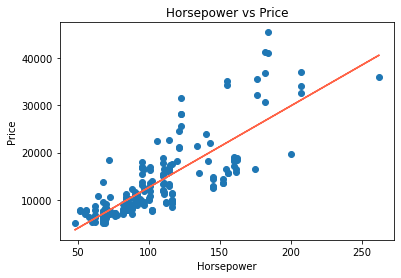

In [ ]:
# visualisasi regression linear
predict_for_xtrain = lr.predict(X)

temporary_dataframe = pd.DataFrame({
    'x' : df["horsepower"],
    'y' : predict_for_xtrain
})

plt.scatter(df["horsepower"], df["price"])
plt.plot(temporary_dataframe['x'], temporary_dataframe['y'], color='tomato', linewidth=1.5)

plt.xlabel("Horsepower")
plt.ylabel("Price")

plt.title("Horsepower vs Price")
plt.show()

# Logistic Regression

In [ ]:
# load dataset
df_1 = pd.read_csv("/content/drive/MyDrive/Datasets/winequality-red.csv")
# melihat 5 baris pertama dari data
df_1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


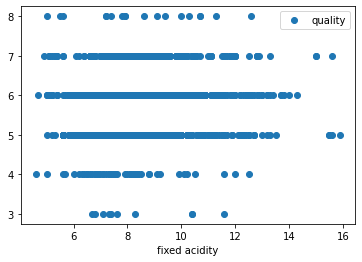

In [ ]:
# visualisasi perbandingan fixes acidity dan quality
df_1.plot(x = "fixed acidity", y = "quality", style = "o")

In [ ]:
# membuat variabel  X dan y
X = df_1.drop("quality", axis=1)
y = df_1["quality"]

In [ ]:
# mencari dan menangani missing value
df_1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# membagi data menjadi data training dan data testing denngan porsi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# membuat object linear regression
model_lrg = LogisticRegression()
# training model dengan menggunakan data training yang telah dibagi
model_lrg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# melihat data testing variabel X
print(X_test)

      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
1192            7.2              0.25         0.37  ...  3.52       0.80     12.4
572            10.2              0.24         0.49  ...  3.14       0.61     10.4
1418            7.8              0.53         0.01  ...  3.16       0.46      9.8
1481            8.2              0.28         0.60  ...  3.39       0.68     10.6
54              7.6              0.51         0.15  ...  3.17       0.63     10.2
...             ...               ...          ...  ...   ...        ...      ...
1419            7.7              0.64         0.21  ...  3.27       0.45      9.9
623             7.9              0.51         0.25  ...  3.49       0.96     12.1
1345            8.2              0.44         0.24  ...  3.25       0.53     10.2
859             6.8              0.56         0.22  ...  3.40       0.82     11.2
1021           11.3              0.36         0.66  ...  3.20       0.53     11.9

[480 rows x 11 

In [ ]:
X_test.reset_index(drop=True, inplace=True)

In [ ]:
# prediksi data training
prd = model_lrg.predict(X_test)

In [ ]:
# membuat data frame
prd_df = pd.DataFrame(prd)

In [ ]:
# melihat data frame prediksi
print(prd_df)

     0
0    6
1    6
2    5
3    6
4    6
..  ..
475  5
476  6
477  6
478  6
479  6

[480 rows x 1 columns]


In [ ]:
result = pd.concat([X_test, prd_df], axis=1, ignore_index=True)

In [ ]:
result

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.2,0.25,0.37,2.5,0.063,11.0,41.0,0.99439,3.52,0.80,12.4,6
1,10.2,0.24,0.49,2.4,0.075,10.0,28.0,0.99780,3.14,0.61,10.4,6
2,7.8,0.53,0.01,1.6,0.077,3.0,19.0,0.99500,3.16,0.46,9.8,5
3,8.2,0.28,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,6
4,7.6,0.51,0.15,2.8,0.110,33.0,73.0,0.99550,3.17,0.63,10.2,6
...,...,...,...,...,...,...,...,...,...,...,...,...
475,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
476,7.9,0.51,0.25,2.9,0.077,21.0,45.0,0.99740,3.49,0.96,12.1,6
477,8.2,0.44,0.24,2.3,0.063,10.0,28.0,0.99613,3.25,0.53,10.2,6
478,6.8,0.56,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2,6


In [ ]:
result = pd.concat([y_test, prd_df], axis=1, ignore_index=True)
result

,0,1
0,NaN,6.0
1,NaN,6.0
2,NaN,5.0
3,NaN,6.0
4,5.0,6.0
...,...,...
1583,5.0,NaN
1588,6.0,NaN
1590,6.0,NaN
1591,6.0,NaN
